<a href="https://colab.research.google.com/github/nrflynn2/swe-molecular-sciences/blob/main/colab_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Let's Sort It Out

Review the lab material and go through the entire notebook. The lab contains 5 exercises for you to solve. The entire lab is worth 2.5% of your final grade and each exercise is worth 0.4% of your final grade. Going through the full notebook is worth 0.5% of your final grade. Any extra credit or bonus exercises are worth an additional 0.4%.

Labs are due by Friday at 11:59 PM PST and can be submitted on BCourses assignment page for the corresponding lab.

## Introduction

Welcome to your first algorithms lab! Today, we'll explore the fascinating world of sorting algorithms. Sorting is one of the most fundamental operations in computer science, and understanding how different sorting algorithms work will help you become a better programmer.

In this lab, you will:
- Implement basic sorting algorithms
- Analyze their time complexity
- Compare their performance
- Apply sorting to solve real-world problems

Let's begin by importing the necessary libraries:

In [10]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

# Helper function to generate random lists
def generate_random_list(size, min_val=1, max_val=100):
    """Generate a random list of integers."""
    return [random.randint(min_val, max_val) for _ in range(size)]

# Helper function to check if a list is sorted
def is_sorted(lst):
    """Check if a list is sorted in ascending order."""
    return all(lst[i] <= lst[i+1] for i in range(len(lst)-1))

# Helper function to time a sorting function
def time_sort(sort_func, lst):
    """Time how long a sorting function takes."""
    lst_copy = lst.copy()
    start = time.time()
    sort_func(lst_copy)
    end = time.time()
    return end - start

print("Setup complete! Let's start sorting!")

Setup complete! Let's start sorting!


## Warm-up: Understanding Bubble Sort

Before we dive into the exercises, let's review bubble sort together. Bubble sort repeatedly steps through the list, compares adjacent elements, and swaps them if they're in the wrong order.

Here's a visual implementation:

In [11]:
def bubble_sort_demo(lst):
    """Bubble sort with step-by-step visualization."""
    n = len(lst) # total number of items in the list
    lst = lst.copy() # copy of the input list
    print(f"Starting list: {lst}")

    for i in range(n): # ensures we make enough passes through the list to sort it completely
        swapped = False
        for j in range(0, n-i-1):
            if lst[j] > lst[j+1]:
                lst[j], lst[j+1] = lst[j+1], lst[j]
                swapped = True
                print(f"Swapped {lst[j+1]} and {lst[j]}: {lst}")

        if not swapped:
            break

    print(f"Final sorted list: {lst}")
    return lst

# Demo
demo_list = [64, 34, 25, 12, 22, 11, 90]
bubble_sort_demo(demo_list)

Starting list: [64, 34, 25, 12, 22, 11, 90]
Swapped 64 and 34: [34, 64, 25, 12, 22, 11, 90]
Swapped 64 and 25: [34, 25, 64, 12, 22, 11, 90]
Swapped 64 and 12: [34, 25, 12, 64, 22, 11, 90]
Swapped 64 and 22: [34, 25, 12, 22, 64, 11, 90]
Swapped 64 and 11: [34, 25, 12, 22, 11, 64, 90]
Swapped 34 and 25: [25, 34, 12, 22, 11, 64, 90]
Swapped 34 and 12: [25, 12, 34, 22, 11, 64, 90]
Swapped 34 and 22: [25, 12, 22, 34, 11, 64, 90]
Swapped 34 and 11: [25, 12, 22, 11, 34, 64, 90]
Swapped 25 and 12: [12, 25, 22, 11, 34, 64, 90]
Swapped 25 and 22: [12, 22, 25, 11, 34, 64, 90]
Swapped 25 and 11: [12, 22, 11, 25, 34, 64, 90]
Swapped 22 and 11: [12, 11, 22, 25, 34, 64, 90]
Swapped 12 and 11: [11, 12, 22, 25, 34, 64, 90]
Final sorted list: [11, 12, 22, 25, 34, 64, 90]


[11, 12, 22, 25, 34, 64, 90]

---
## Exercise 1: Implement Selection Sort (0.4%)

Selection sort works by repeatedly finding the minimum element from the unsorted portion and placing it at the beginning.

**Your task:** Complete the `selection_sort` function below.

Algorithm steps:
1. Find the minimum element in the unsorted portion
2. Swap it with the first element of the unsorted portion
3. Move the boundary of the unsorted portion one element to the right
4. Repeat until the entire list is sorted

In [12]:
def selection_sort(lst):
    """
    Implement selection sort algorithm.

    Args:
        lst: A list of comparable elements

    Returns:
        None (sorts the list in-place)
    """
    n = len(lst)

    # TODO: Implement selection sort
    # Hint: Use two nested loops
    # The outer loop controls the position to fill
    for i in range(n):
    # The inner loop finds the minimum in the remaining unsorted portion
      min_idx = i
      for j in range(i + 1, n):
        if lst[j] < lst[min_idx]:
          min_idx = j


      # Swap the found minimum element with first element of the unsorted portion
      lst[i], lst[min_idx] = lst[min_idx], lst[i]

    return lst

# Test your implementation
test_list = [64, 25, 12, 22, 11]
print(f"Original list: {test_list}")
selection_sort(test_list)
print(f"Sorted list: {test_list}")
print(f"Is sorted correctly? {is_sorted(test_list)}")

# Additional test cases
test_cases = [
    [],
    [1],
    [3, 1, 4, 1, 5, 9, 2, 6],
    [5, 4, 3, 2, 1],
    [1, 1, 1, 1]
]

for test in test_cases:
    test_copy = test.copy()
    selection_sort(test_copy)
    assert is_sorted(test_copy), f"Failed on {test}"
print("✅ All test cases passed!")

Original list: [64, 25, 12, 22, 11]
Sorted list: [11, 12, 22, 25, 64]
Is sorted correctly? True
✅ All test cases passed!


---
## Exercise 2: Implement Insertion Sort (0.4%)

Insertion sort builds the final sorted list one item at a time. It's similar to how you might sort playing cards in your hands.

**Your task:** Complete the `insertion_sort` function below.

Algorithm steps:
1. Start with the second element (index 1)
2. Compare it with elements before it
3. Insert it in the correct position among the sorted elements
4. Repeat for all elements

In [13]:
def insertion_sort(lst):
    """
    Implement insertion sort algorithm.

    Args:
        lst: A list of comparable elements

    Returns:
        None (sorts the list in-place)
    """
    # TODO: Implement insertion sort
    # Hint: For each element, find where it belongs in the sorted portion
    # and shift elements to make room for it

    # YOUR CODE HERE
    n = len(lst)
    for i in range(1, n):
        curr_num = lst[i] # save the number
        j = i

        while j > 0 and lst[j - 1] > curr_num:
            lst[j] = lst[j - 1]
            j -= 1

        lst[j] = curr_num


# Test your implementation
test_list = [12, 11, 13, 5, 6]
print(f"Original list: {test_list}")
insertion_sort(test_list)
print(f"Sorted list: {test_list}")
print(f"Is sorted correctly? {is_sorted(test_list)}")

# Test with different scenarios
test_cases = [
    [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5],
    [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    [1, 2, 3, 4, 5],
    [5, 2, 4, 6, 1, 3]
]

for test in test_cases:
    test_copy = test.copy()
    insertion_sort(test_copy)
    assert is_sorted(test_copy), f"Failed on {test}"
print("✅ All test cases passed!")

Original list: [12, 11, 13, 5, 6]
Sorted list: [5, 6, 11, 12, 13]
Is sorted correctly? True
✅ All test cases passed!


---
## Exercise 3: Counting Comparisons (0.4%)

Understanding the efficiency of sorting algorithms is crucial. Let's analyze how many comparisons each algorithm makes.

**Your task:** Modify the bubble sort implementation to count the number of comparisons made during sorting.

In [14]:
def bubble_sort_with_count(lst):
    """
    Bubble sort that counts the number of comparisons made.

    Args:
        lst: A list of comparable elements

    Returns:
        tuple: (sorted_list, comparison_count)
    """
    lst = lst.copy()  # Don't modify the original list
    n = len(lst)
    comparison_count = 0

    # TODO: Implement bubble sort while counting comparisons
    # Remember to increment comparison_count each time you compare two elements

    # YOUR CODE HERE
    print(f"Starting list: {lst}")

    for i in range(n): # ensures we make enough passes through the list to sort it completely
        swapped = False
        for j in range(0, n-i-1):
            comparison_count += 1
            if lst[j] > lst[j+1]:
                lst[j], lst[j+1] = lst[j+1], lst[j]
                swapped = True
                print(f"Swapped {lst[j+1]} and {lst[j]}: {lst}")
        if not swapped:
            break

    print(f"Final sorted list: {lst}")
    return lst, comparison_count

# Test your implementation
test_sizes = [5, 10, 20, 30]
for size in test_sizes:
    test_list = generate_random_list(size)
    sorted_list, count = bubble_sort_with_count(test_list)
    print(f"List size: {size}, Comparisons: {count}\n")
    assert is_sorted(sorted_list), f"List not sorted correctly!"

# Analyze worst case
worst_case = list(range(10, 0, -1))  # [10, 9, 8, ..., 1]
_, worst_count = bubble_sort_with_count(worst_case)
print(f"\nWorst case for size 10: {worst_count} comparisons")
print(f"Expected (n*(n-1)/2): {10*9//2} comparisons")


Starting list: [17, 82, 83, 69, 12]
Swapped 83 and 69: [17, 82, 69, 83, 12]
Swapped 83 and 12: [17, 82, 69, 12, 83]
Swapped 82 and 69: [17, 69, 82, 12, 83]
Swapped 82 and 12: [17, 69, 12, 82, 83]
Swapped 69 and 12: [17, 12, 69, 82, 83]
Swapped 17 and 12: [12, 17, 69, 82, 83]
Final sorted list: [12, 17, 69, 82, 83]
List size: 5, Comparisons: 10

Starting list: [55, 61, 44, 93, 19, 60, 38, 57, 61, 86]
Swapped 61 and 44: [55, 44, 61, 93, 19, 60, 38, 57, 61, 86]
Swapped 93 and 19: [55, 44, 61, 19, 93, 60, 38, 57, 61, 86]
Swapped 93 and 60: [55, 44, 61, 19, 60, 93, 38, 57, 61, 86]
Swapped 93 and 38: [55, 44, 61, 19, 60, 38, 93, 57, 61, 86]
Swapped 93 and 57: [55, 44, 61, 19, 60, 38, 57, 93, 61, 86]
Swapped 93 and 61: [55, 44, 61, 19, 60, 38, 57, 61, 93, 86]
Swapped 93 and 86: [55, 44, 61, 19, 60, 38, 57, 61, 86, 93]
Swapped 55 and 44: [44, 55, 61, 19, 60, 38, 57, 61, 86, 93]
Swapped 61 and 19: [44, 55, 19, 61, 60, 38, 57, 61, 86, 93]
Swapped 61 and 60: [44, 55, 19, 60, 61, 38, 57, 61, 86, 9

---
## Exercise 4: Performance Comparison (0.4%)

Now let's compare the performance of different sorting algorithms on various input sizes.

**Your task:** Complete the performance comparison by implementing the missing parts of the code below.

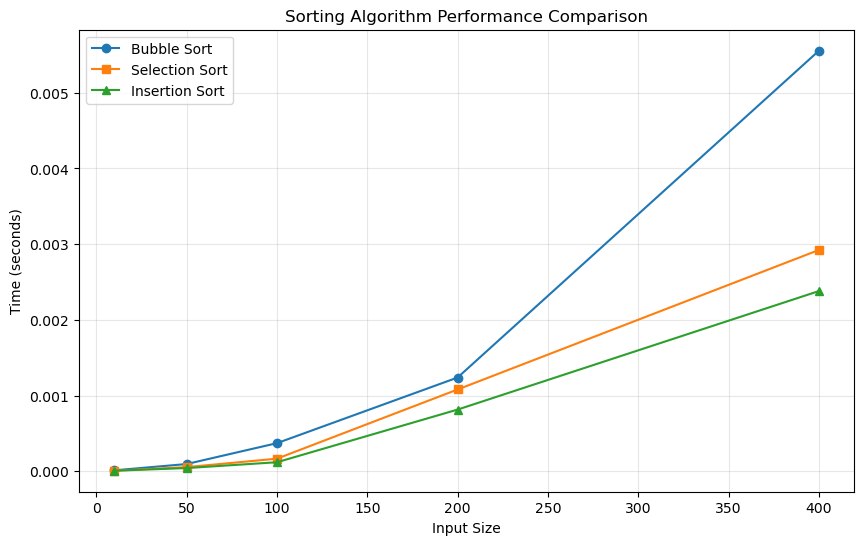

In [18]:
def compare_sorting_algorithms(sizes=[10, 50, 100, 200, 400]):
    """
    Compare the performance of bubble sort, selection sort, and insertion sort.

    Args:
        sizes: List of input sizes to test

    Returns:
        dict: Timing results for each algorithm
    """
    results = {
        'bubble': [],
        'selection': [],
        'insertion': []
    }

    # We implement a working bubble sort for comparison
    def bubble_sort(lst):
        n = len(lst)
        for i in range(n):
            swapped = False
            for j in range(0, n-i-1):
                if lst[j] > lst[j+1]:
                    lst[j], lst[j+1] = lst[j+1], lst[j]
                    swapped = True
            if not swapped:
                break


    def selection_sort(lst):
        n = len(lst)
        for i in range(n):
            min_idx = i
            for j in range(i + 1, n):
                if lst[j] < lst[min_idx]:
                    min_idx = j
            lst[i], lst[min_idx] = lst[min_idx], lst[i]

        #return lst
    

    def insertion_sort(lst):
        n = len(lst)
        for i in range(1, n):
            curr_num = lst[i] # save the number
            j = i

            while j > 0 and lst[j - 1] > curr_num:
                lst[j] = lst[j - 1]
                j -= 1

            lst[j] = curr_num


    for size in sizes:
        # Generate a random list for testing
        test_list = generate_random_list(size)

        # TODO: Time each sorting algorithm on the same list
        # Use the time_sort helper function defined earlier

        # YOUR CODE HERE
        # Hint: results['bubble'].append(time_sort(bubble_sort, test_list))

        results['bubble'].append(time_sort(bubble_sort, test_list.copy()))
        results['selection'].append(time_sort(selection_sort, test_list.copy()))  
        results['insertion'].append(time_sort(insertion_sort, test_list.copy()))
        

    return results, sizes

# Run the comparison
results, sizes = compare_sorting_algorithms()

# Visualize the results
if results['bubble']:  # Check if results were collected
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, results['bubble'], 'o-', label='Bubble Sort')
    plt.plot(sizes, results['selection'], 's-', label='Selection Sort')
    plt.plot(sizes, results['insertion'], '^-', label='Insertion Sort')
    plt.xlabel('Input Size')
    plt.ylabel('Time (seconds)')
    plt.title('Sorting Algorithm Performance Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

---
## Exercise 5: Real-World Application - Student Grade Sorting (0.4%)

Let's apply sorting to a real problem. You need to sort student records by their grades, with the option to sort by different criteria.

**Your task:** Implement a function that sorts student records using any sorting algorithm you've learned.

In [ ]:
class Student:
    def __init__(self, name, student_id, grade):
        self.name = name
        self.student_id = student_id
        self.grade = grade

    def __repr__(self):
        return f"Student('{self.name}', ID:{self.student_id}, Grade:{self.grade})"

def sort_students(students, sort_by='grade', descending=False):
    """
    Sort a list of Student objects.

    Args:
        students: List of Student objects
        sort_by: Field to sort by ('grade', 'name', or 'student_id')
        descending: If True, sort in descending order

    Returns:
        Sorted list of students (creates a new list)
    """
    students_copy = students.copy()

    # TODO: Implement sorting based on the specified field
    # You can use any sorting algorithm you've implemented
    # Hint: You'll need to compare different attributes based on sort_by

    # YOUR CODE HERE

    

    return students_copy

# Test data
students = [
    Student("Alice", 1001, 85),
    Student("Bob", 1002, 92),
    Student("Charlie", 1003, 78),
    Student("Diana", 1004, 95),
    Student("Eve", 1005, 88),
    Student("Frank", 1006, 82)
]

# Test sorting by grade (ascending)
sorted_by_grade = sort_students(students, sort_by='grade', descending=False)
print("Sorted by grade (ascending):")
for student in sorted_by_grade:
    print(f"  {student}")

# Test sorting by name
sorted_by_name = sort_students(students, sort_by='name', descending=False)
print("\nSorted by name:")
for student in sorted_by_name:
    print(f"  {student}")

# Verify sorting
grades = [s.grade for s in sorted_by_grade]
assert grades == sorted(grades), "Grade sorting failed!"
print("\n✅ Student sorting works correctly!")

Sorted by grade (ascending):
  Student('Alice', ID:1001, Grade:85)
  Student('Bob', ID:1002, Grade:92)
  Student('Charlie', ID:1003, Grade:78)
  Student('Diana', ID:1004, Grade:95)
  Student('Eve', ID:1005, Grade:88)
  Student('Frank', ID:1006, Grade:82)

Sorted by name:
  Student('Alice', ID:1001, Grade:85)
  Student('Bob', ID:1002, Grade:92)
  Student('Charlie', ID:1003, Grade:78)
  Student('Diana', ID:1004, Grade:95)
  Student('Eve', ID:1005, Grade:88)
  Student('Frank', ID:1006, Grade:82)


AssertionError: Grade sorting failed!

---
## Lab Summary

Congratulations on completing Lab 1! 🎉

You've learned about:
- **Selection Sort**: O(n²) - Simple but inefficient
- **Insertion Sort**: O(n²) - Efficient for small or nearly sorted data  
- **Bubble Sort**: O(n²) - Simple but generally the slowest

### Key Takeaways:
1. Different sorting algorithms have different performance characteristics
2. The choice of algorithm depends on your data and requirements
3. Understanding how these algorithms work helps you write better code

### Submission Instructions:
1. Ensure all exercises are completed and pass the test cases
2. Save your notebook with all outputs
3. Submit on BCourses before Friday at 11:59 PM PST

## Selection Sort in Virtual Screening: Multi-Parameter Optimization for Drug Discovery

### Background
In structure-based drug discovery, virtual screening generates thousands to millions of predicted protein-ligand binding poses. Each pose is characterized by multiple parameters:

- **Binding Energy (ΔG)**: Estimated free energy of binding in kcal/mol (more negative = stronger binding)
- **RMSD**: Root-mean-square deviation from optimal geometry in Ångströms (lower = better pose quality)
- **Hydrogen Bonds**: Number of H-bonds formed with the target (more = better specificity)
- **Buried Surface Area (BSA)**: Contact surface in Ų (larger = more extensive interaction)

### The Challenge
Simple ranking by binding energy alone often misses promising compounds because:
1. Scoring functions have inherent errors (~2 kcal/mol)
2. Enthalpic contributions (H-bonds) may outweigh entropic penalties
3. Pose quality (RMSD) affects reliability of predictions

### Pareto Optimization Approach
We implement multi-parameter optimization using a weighted scoring function that balances all parameters. While production systems use O(n log n) sorting for millions of compounds, selection sort's O(n²) complexity is acceptable for teaching the importance of multi-objective optimization.

If curious to learn more about pareto frontier, see https://www.mayerowitz.io/blog/mario-meets-pareto

### Implementation
The code below demonstrates:
1. Selection sort implementation with custom comparison keys
2. Single-parameter ranking (binding energy only)
3. Multi-parameter Pareto scoring
4. Comparison of ranking differences

In [ ]:
import random
from dataclasses import dataclass
from typing import List, Tuple
import numpy as np

# ============================================================================
# DATA STRUCTURE FOR DOCKING RESULTS
# ============================================================================

@dataclass
class DockingResult:
    """
    Represents a molecular docking result from AutoDock Vina or Schrödinger Glide.
    Typical ranges based on real drug discovery campaigns.
    """
    ligand_id: str
    binding_energy: float      # kcal/mol, typically -4 to -12 for drug-like molecules
    rmsd: float                # Å, <2.0 is considered reliable pose
    num_h_bonds: int          # 0-8 typical for small molecules
    buried_surface_area: float # Ų, 200-400 for drug-like molecules

    def __lt__(self, other):
        """Default comparison by binding energy (more negative is better)."""
        return self.binding_energy < other.binding_energy

    def __repr__(self):
        return f"{self.ligand_id}(ΔG={self.binding_energy:.1f})"


# ============================================================================
# SELECTION SORT IMPLEMENTATION
# ============================================================================

def selection_sort_traced(lst: List, key=None) -> Tuple[List, int, int]:
    """
    Selection sort with operation counting for complexity analysis.

    Args:
        lst: List to sort (modified in-place)
        key: Optional function to extract comparison key

    Returns:
        Tuple of (sorted list, comparison count, swap count)
    """
    n = len(lst)
    comparisons = 0
    swaps = 0

    for i in range(n - 1):
        min_idx = i

        for j in range(i + 1, n):
            comparisons += 1

            # Use key function if provided, otherwise direct comparison
            if key:
                if key(lst[j]) < key(lst[min_idx]):
                    min_idx = j
            else:
                if lst[j] < lst[min_idx]:
                    min_idx = j

        # Swap if needed
        if min_idx != i:
            lst[i], lst[min_idx] = lst[min_idx], lst[i]
            swaps += 1

    return lst, comparisons, swaps


# ============================================================================
# PARETO SCORING FUNCTION
# ============================================================================

def calculate_pareto_score(compound: DockingResult, weights: dict = None) -> float:
    """
    Calculate multi-parameter optimization score for compound ranking.

    The score combines normalized parameters with customizable weights:
    - Binding energy: Lower is better (negative values)
    - RMSD: Lower is better (penalty for poor poses)
    - H-bonds: More is better (specificity indicator)
    - BSA: Larger is better (interaction surface)

    Args:
        compound: DockingResult object
        weights: Dict with parameter weights (must sum to 1.0)

    Returns:
        Pareto score (higher is better)
    """
    if weights is None:
        # Default weights based on typical drug discovery priorities
        weights = {
            'energy': 0.40,   # Primary importance
            'rmsd': 0.20,     # Pose quality
            'hbonds': 0.25,   # Specificity
            'bsa': 0.15       # Interaction extent
        }

    # Normalize parameters to 0-1 scale
    energy_norm = min(1.0, max(0.0, (-compound.binding_energy - 4) / 8))  # -4 to -12 range
    rmsd_norm = min(1.0, max(0.0, (3.0 - compound.rmsd) / 3.0))          # 0-3 Å range
    hbond_norm = min(1.0, compound.num_h_bonds / 8.0)                     # 0-8 range
    bsa_norm = min(1.0, max(0.0, (compound.buried_surface_area - 200) / 200))  # 200-400 range

    # Calculate weighted score
    score = (
        energy_norm * weights['energy'] +
        rmsd_norm * weights['rmsd'] +
        hbond_norm * weights['hbonds'] +
        bsa_norm * weights['bsa']
    )

    return score


# ============================================================================
# GENERATE REALISTIC VIRTUAL SCREENING DATA
# ============================================================================

def generate_screening_data(n_compounds: int = 100, seed: int = 42) -> List[DockingResult]:
    """
    Generate realistic virtual screening results.

    Simulates output from high-throughput docking with correlations between parameters:
    - Better binding energy tends to correlate with more H-bonds
    - Lower RMSD indicates more reliable poses
    - BSA correlates with binding energy
    """
    random.seed(seed)
    np.random.seed(seed)

    compounds = []

    # Compound sources for realistic IDs
    sources = ['ZINC', 'ChEMBL', 'DrugBank', 'FDA', 'NatProd', 'PubChem']

    for i in range(n_compounds):
        # Generate correlated parameters
        base_quality = random.random()  # 0-1, represents overall compound quality

        # Binding energy: -4 to -12 kcal/mol, better compounds more negative
        binding_energy = -4 - 8 * (base_quality + random.gauss(0, 0.2))
        binding_energy = max(-12, min(-4, binding_energy))

        # RMSD: 0.5 to 3.0 Å, inversely correlated with quality
        rmsd = 0.5 + 2.5 * (1 - base_quality + random.gauss(0, 0.15))
        rmsd = max(0.5, min(3.0, rmsd))

        # H-bonds: 0-8, correlated with binding energy
        expected_hbonds = int(3 + 5 * base_quality)
        num_h_bonds = max(0, min(8, int(expected_hbonds + random.gauss(0, 1.5))))

        # BSA: 200-400 Ų, correlated with binding energy
        bsa = 200 + 200 * (base_quality + random.gauss(0, 0.2))
        bsa = max(200, min(400, bsa))

        # Generate compound ID
        source = random.choice(sources)
        compound_id = f"{source}_{random.randint(100000, 999999)}"

        compounds.append(DockingResult(
            ligand_id=compound_id,
            binding_energy=round(binding_energy, 2),
            rmsd=round(rmsd, 2),
            num_h_bonds=num_h_bonds,
            buried_surface_area=round(bsa, 1)
        ))

    return compounds


# ============================================================================
# ANALYSIS AND VISUALIZATION
# ============================================================================

def analyze_screening_results(compounds: List[DockingResult], top_k: int = 10):
    """
    Comprehensive analysis of virtual screening results using selection sort.
    """
    print("=" * 80)
    print("🧬 VIRTUAL SCREENING ANALYSIS: Multi-Parameter Optimization")
    print("=" * 80)

    print(f"\n📊 Dataset: {len(compounds)} compounds from virtual screening")
    print(f"   Goal: Identify top {top_k} drug candidates\n")

    # Show sample of unsorted data
    print("Sample of unsorted docking results (first 5):")
    print(f"{'Compound ID':20} | {'ΔG (kcal/mol)':13} | {'RMSD (Å)':9} | {'H-bonds':8} | {'BSA (Ų)':8}")
    print("-" * 70)
    for compound in compounds[:5]:
        print(f"{compound.ligand_id:20} | {compound.binding_energy:13.2f} | "
              f"{compound.rmsd:9.2f} | {compound.num_h_bonds:8} | {compound.buried_surface_area:8.1f}")

    # ============ METHOD 1: BINDING ENERGY ONLY ============
    print("\n" + "=" * 80)
    print("METHOD 1: Traditional Ranking by Binding Energy Only")
    print("-" * 80)

    # Copy and sort by binding energy
    energy_sorted = compounds.copy()
    _, comps1, swaps1 = selection_sort_traced(energy_sorted)

    print(f"Selection sort statistics: {comps1} comparisons, {swaps1} swaps")
    print(f"Theoretical O(n²) comparisons: {len(compounds) * (len(compounds) - 1) // 2}")

    print(f"\nTop {top_k} by binding energy:")
    for i, compound in enumerate(energy_sorted[:top_k], 1):
        quality = "⚠️ " if compound.rmsd > 2.0 else "✓"  # Flag unreliable poses
        print(f"{i:2}. {quality} {compound.ligand_id:20} | ΔG = {compound.binding_energy:6.2f} | "
              f"RMSD = {compound.rmsd:4.2f} | H-bonds = {compound.num_h_bonds}")

    # ============ METHOD 2: PARETO OPTIMIZATION ============
    print("\n" + "=" * 80)
    print("METHOD 2: Multi-Parameter Pareto Optimization")
    print("-" * 80)

    # Calculate Pareto scores
    for compound in compounds:
        compound.pareto_score = calculate_pareto_score(compound)

    # Sort by Pareto score (descending, so use negative)
    pareto_sorted = compounds.copy()
    _, comps2, swaps2 = selection_sort_traced(pareto_sorted, key=lambda x: -x.pareto_score)

    print("Pareto scoring weights:")
    print("  • Binding energy: 40% (primary screening criterion)")
    print("  • RMSD penalty: 20% (pose reliability)")
    print("  • H-bond bonus: 25% (target specificity)")
    print("  • BSA score: 15% (interaction surface)")

    print(f"\nTop {top_k} by Pareto score:")
    for i, compound in enumerate(pareto_sorted[:top_k], 1):
        print(f"{i:2}. {compound.ligand_id:20} | Score = {compound.pareto_score:.3f} | "
              f"ΔG = {compound.binding_energy:6.2f} | RMSD = {compound.rmsd:4.2f} | "
              f"H-bonds = {compound.num_h_bonds}")

    # ============ COMPARISON ANALYSIS ============
    print("\n" + "=" * 80)
    print("COMPARISON: Differences in Top Hits")
    print("-" * 80)

    # Find compounds that appear in one list but not the other
    energy_top_ids = {c.ligand_id for c in energy_sorted[:top_k]}
    pareto_top_ids = {c.ligand_id for c in pareto_sorted[:top_k]}

    only_energy = energy_top_ids - pareto_top_ids
    only_pareto = pareto_top_ids - energy_top_ids
    both = energy_top_ids & pareto_top_ids

    print(f"Compounds in both top-{top_k} lists: {len(both)}")
    print(f"Only in energy-based ranking: {len(only_energy)}")
    print(f"Only in Pareto ranking: {len(only_pareto)}")

    if only_pareto:
        print(f"\n💡 Compounds promoted by Pareto optimization:")
        for compound in pareto_sorted[:top_k]:
            if compound.ligand_id in only_pareto:
                print(f"   {compound.ligand_id}: High H-bonds ({compound.num_h_bonds}) "
                      f"and good RMSD ({compound.rmsd:.2f}Å) despite ΔG = {compound.binding_energy:.2f}")

    # ============ PERFORMANCE IMPLICATIONS ============
    print("\n" + "=" * 80)
    print("COMPUTATIONAL COMPLEXITY ANALYSIS")
    print("-" * 80)

    print(f"Dataset size: n = {len(compounds)}")
    print(f"Selection sort comparisons: {comps1} = O(n²)")
    print(f"Time for {len(compounds)} compounds: ~{comps1/1000:.1f}ms (assuming 1μs/comparison)")

    # Extrapolate to larger datasets
    for n in [1000, 10000, 100000, 1000000]:
        comparisons = n * (n - 1) // 2
        time_seconds = comparisons / 1_000_000  # Assuming 1μs per comparison
        if time_seconds < 60:
            time_str = f"{time_seconds:.2f}s"
        elif time_seconds < 3600:
            time_str = f"{time_seconds/60:.1f}min"
        else:
            time_str = f"{time_seconds/3600:.1f}hours"

        suitable = "✓" if n <= 1000 else "✗"
        print(f"  n = {n:7,}: {comparisons:15,} comparisons → {time_str:>10} {suitable}")

    print("\n🔧 Recommendation: Use heap-based selection or quicksort for n > 1000")
    print("   For million-compound libraries, use approximate methods (LSH, random sampling)")


# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    # Generate realistic virtual screening data
    print("🔬 Generating virtual screening dataset...")
    compounds = generate_screening_data(n_compounds=50, seed=42)

    # Run comprehensive analysis
    analyze_screening_results(compounds, top_k=10)

    print("\n" + "=" * 80)
    print("💊 KEY INSIGHTS FOR DRUG DISCOVERY:")
    print("-" * 80)
    print("1. Single-parameter ranking can miss promising compounds")
    print("2. Multi-parameter optimization finds balanced candidates")
    print("3. Selection sort is viable for small focused libraries (<1000 compounds)")
    print("4. Production pipelines need O(n log n) algorithms for HTS scale")
    print("5. Consider approximate algorithms for ultra-large virtual libraries")
    print("=" * 80)